<a href="https://colab.research.google.com/github/Bhushancr7/Heart-Disease-Prediction-IT/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Heart disease using Machine Learning

This notebook looks into using various Python-based ML and Data Science libraries in an attempt to build a Machine Learning
model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling


**About Heart Disease**

Cardiovascular disease or heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease. From WHO statistics every year 17.9 million dying from heart disease. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart disease.

From the dataset if we create suitable machine learning technique which classify the heart disease more accurately, it is very helpful to the health organisation as well as patients.

## 1. Problem Defintion

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository

There is also a version of it available on Kaggle.

<a href="https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv">Heart Disease Date</a>

## 3. Evaluation

**Target to reach more than 85%**

If the model scored better than 85% we will select the model


## 4. Features

<ol>
    <li><b>age:</b> displays the age of the individual.</li>
    <li><b>sex:</b> displays the gender of the individual using the following format :
    <ul>
        <li>1 = male</li>
        <li>0 = female</li>
        </ul></li>
    <li><b>cp (Chest-Pain Type):</b> displays the type of chest-pain experienced by the individual using the following format :
    <ul>
         <li>0 = typical angina</li>
         <li>1 = atypical angina</li>
         <li>2= non — anginal pain</li>
         <li>3 = asymptotic</li>
    </ul></li>
    <li><b>trestbps(Resting Blood Pressure):</b> displays the resting blood pressure value of an individual in mmHg (unit)</li>
    <li><b>chol(Serum Cholestrol):</b> displays the serum cholesterol in mg/dl (unit)</li>
    <li><b>fbs (Fasting Blood Sugar):</b> compares the fasting blood sugar value of an individual with 120mg/dl.
        <ul><li>If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)</li></ul></li>
    <li><b>restecg (Resting ECG):</b> displays resting electrocardiographic results
    <ul>
        <li>0 = normal</li>
        <li>1 = having ST-T wave abnormality</li>
        <li>2 = left ventricular hyperthrophy</li>
    </ul>
        </li>
    <li><b>thalach(Max Heart Rate Achieved):</b> displays the max heart rate achieved by an individual.</li>
    <li><b>exang (Exercise induced angina):</b><ul>
        <li>1 = yes</li>
        <li>0 = no</li>
        </ul>
    </li>
    <li><b>oldpeak (ST depression induced by exercise relative to rest):</b> displays the value which is an integer or float.</li>
    <li><b>slope (Peak exercise ST segment) :</b>
        <ul><li>0 = upsloping</li>
            <li>1 = flat</li>
            <li>2 = downsloping</li></ul></li>
    <li><b>ca (Number of major vessels (0–3) colored by flourosopy):</b> displays the value as integer or float.</li>
<li><b>thal :</b> displays the thalassemia (is an inherited blood disorder that causes your body to have less hemoglobin than normal) :
    <ul>
        <li>
            0 = normal</li>
        <li>1 = fixed defect</li>
        <li>2 = reversible defect</li></ul></li>
<li><b>target (Diagnosis of heart disease):</b> Displays whether the individual is suffering from heart disease or not :
    <ul><li>0 = absence</li>
        <li>1 = present.</li></ul></li></ol>


## Preparing the tools
 
**We are going to use :-**

* Pandas & Numpy for Data Analysis and Manipulation


* Matplotlib and Seaborn for Data Visualisation


* Scikit-Learn for the Modeling building and Reports

In [ ]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve,plot_roc_curve

#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

#Pandas-Profiling helps to build a widget that can be used to better visualise it

### Importing the dataset

In [ ]:
df=pd.read_csv('/content/heart-disease.csv')

### Shape of the dataset (Rows, Columns)

In [ ]:
df.shape

(303, 14)

### Head of the dataset

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<br><br>
# Exploratory Data analysis
<br>

### Renaming columns

In [ ]:
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','slope':'ST_slope','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_disease'}, inplace = True)

In [ ]:
# View of the Renamed Dataframe
df.head()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Information about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_pain               303 non-null    int64  
 3   Resting_blood_pressure   303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_blood_sugar      303 non-null    int64  
 6   ECG_results              303 non-null    int64  
 7   Maximum_heart_rate       303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Major_vessels            303 non-null    int64  
 12  Thalassemia_types        303 non-null    int64  
 13  Heart_disease            303 non-null    int64  
dtypes: float64(1), int64(13)
m

### Description about the dataset

In [ ]:
df.describe()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Are there any missing values?

In [ ]:
df.isnull().sum() 

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_disease              0
dtype: int64

### Correlation matrix & Matrix Visualisation

In [ ]:
df.corr()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
Chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
Resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
ECG_results,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Maximum_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
Exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
ST_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


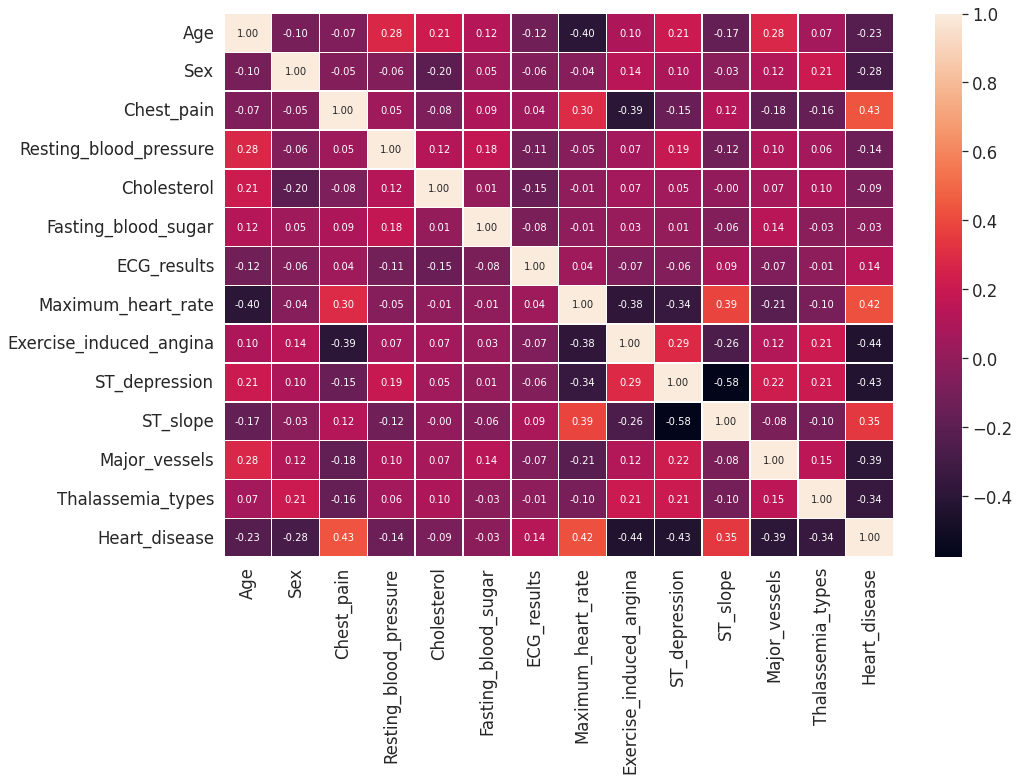

In [ ]:
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

### Target variable (Heart Disease-- 0 (absence) , 1 (present))

In [ ]:
# Let's find out how many of each class are

df['Heart_disease'].value_counts()

1    165
0    138
Name: Heart_disease, dtype: int64

In [ ]:
#Representation of Target variable in Percentage

countNoDisease = len(df[df.Heart_disease == 0])
countHaveDisease = len(df[df.Heart_disease == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.Heart_disease))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.Heart_disease))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


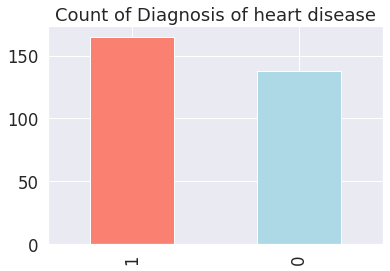

In [ ]:
#Understanding the balancing of the data

df['Heart_disease'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of heart disease");


**interpretation: The above plot shows the count of population having disease and not having disease with respect to sex and the count of having disease is greater**

### Heart Disease Frequency vs Sex

In [ ]:
# Male and Female

df['Sex'].value_counts()

1    207
0     96
Name: Sex, dtype: int64

In [ ]:
#Compare Target column i.e. Heart Disease with Sex Column

pd.crosstab(df['Heart_disease'],df['Sex'])

Sex,0,1
Heart_disease,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

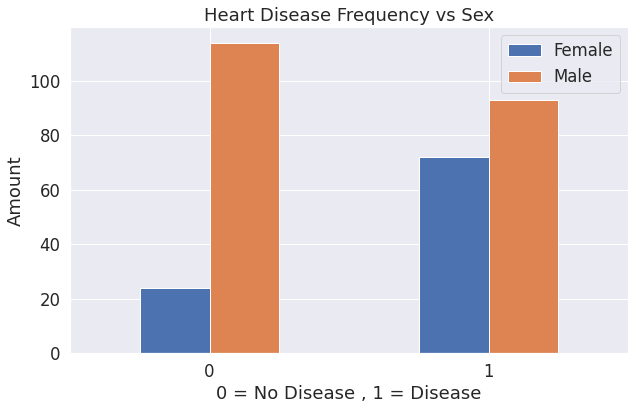

In [ ]:
#Create a plot for crosstab

pd.crosstab(df['Heart_disease'],df['Sex']).plot(kind="bar",figsize=(10,6));
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

**Interpretation: The above plot shows the ratio of population having disease and not having disease with respect to sex**

<br>

### Maximum heart rate vs chest pain wrt Sex

Text(0.5, 1.0, 'plot on Relation Between Maximum heart rate and chest pain types with respect to gender')

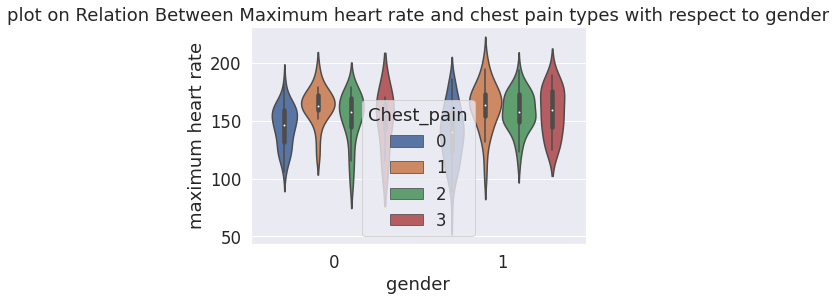

In [ ]:
#Plot on Relation Between Maximum heart rate and chest pain types with respect to gender
sns.violinplot(x="Sex", y="Maximum_heart_rate",hue="Chest_pain", data=df,
               cmap =["BuPy"]);
plt.xlabel('gender')
plt.ylabel('maximum heart rate')
plt.title("plot on Relation Between Maximum heart rate and chest pain types with respect to gender")

**Interpretation**<br>
**The Violen plots of the gender male have higher median and quatile region compared to females and the chest pain type 1 which is atypical angina is higher with respect to the maximum heart rate in both the gender**

<br>

### Thalassemia_types vs ECG results wrt Sex

Text(1.0, 1.0, 'Relation Between resting electrocardiogram rate and thal(haemoglobin defective types) with respect to gender')

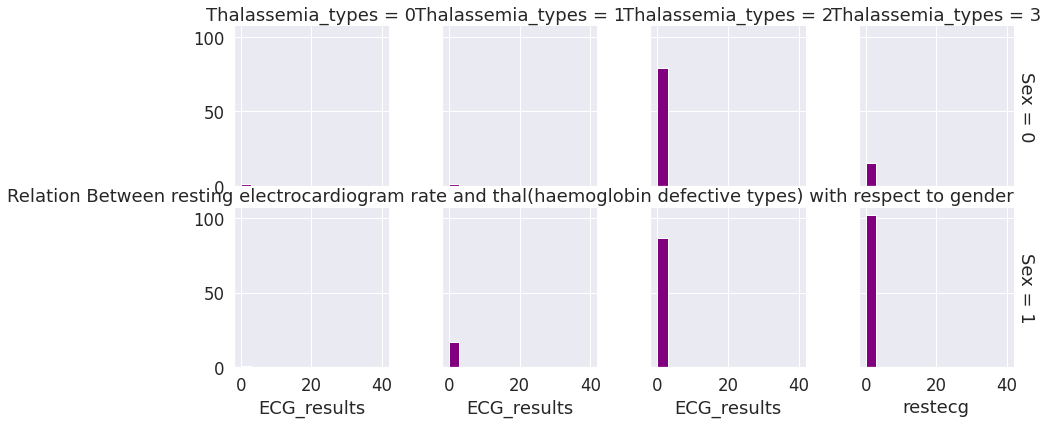

In [ ]:
#Plot on Relation Between resting electrocardiogram rate and thal(haemoglobin defective types) with respect to gender
grid = sns.FacetGrid(df, row="Sex", col="Thalassemia_types", margin_titles=True)
grid.map(plt.hist, "ECG_results", bins=np.linspace(0, 40, 15),color = "Purple");
plt.xlabel('restecg')
plt.ylabel('thal(haemoglobin defective) types')
plt.title(label="Relation Between resting electrocardiogram rate and thal(haemoglobin defective types) with respect to gender",loc ='right')

**Interpretation**<br>
**The histogram plots of the resting ectrocardiogram rate and heamoglobin lowering defect with respect to gender shows that both the gender have same restecg , but the haemoglobin lowering defect type 2 is greater in males whereas the haemoglobin lowering reverse effect type 3 is greater in males and lesser in females , therefore it is tough for females to get back the haemoglobin content if there is a loss on the other hand it is easier for men to get back there haemoglobin content.**

<br>

### Age vs. Max. Heart Rate for Heart Disease

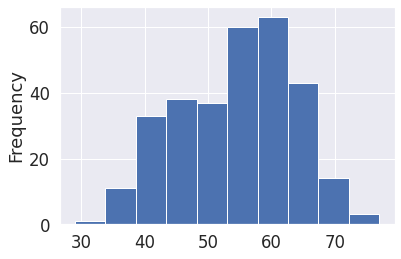

In [ ]:
#Check the distribution of the age column with a histogram

df['Age'].plot(kind='hist');

In [ ]:
df['Maximum_heart_rate'].value_counts()

#Here Length denotes how many different types of categories are there

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: Maximum_heart_rate, Length: 91, dtype: int64

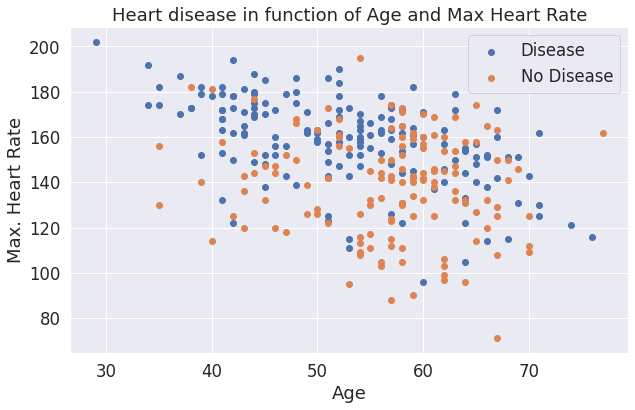

In [ ]:
plt.figure(figsize=(10,6))

#Target is equal to 1
plt.scatter(x = df[df['Heart_disease']==1]['Age'], y = df.Maximum_heart_rate[df.Heart_disease==1])

#Target is equal to 0
plt.scatter(x = df[df['Heart_disease']==0]['Age'], y = df.Maximum_heart_rate[df.Heart_disease==0],);

#Adding some helpful information
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.legend(["Disease","No Disease"])

**Interpretation:<br>
The above plot shows maximum heart rate of population with and without disease with respect to age**

<br>

### Heart Disease Frequency per Chest Pain Type

In [ ]:
# Relation of Heart Disease with Chest Pain Type

pd.crosstab(df['Chest_pain'],df['Heart_disease'])

Heart_disease,0,1
Chest_pain,,
0,104,39
1,9,41
2,18,69
3,7,16


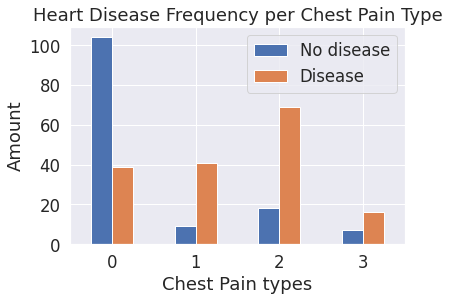

In [ ]:
# Make the crosstab more visual

pd.crosstab(df['Chest_pain'],df['Heart_disease']).plot(kind='bar')
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

**Interpretation:<br>
The above plot shows frequency of each chest pain type for the population having and not having disease where type 0 is greater and where the population is more prone to not having disese**

<br>

### Resting Blood Pressure

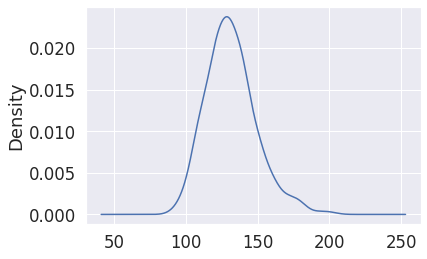

In [ ]:
df['Resting_blood_pressure'].plot(kind='kde')

**Interpretation:<br>
The above plot shows the density of Resting blood pressure and the maximum density is around 120-140**

<br>

### Chest_pain vs Resting blood pressure wrt sex

Text(0.5, 1.0, 'Relation Between resting chest pain types and Blood Pressure Rate with respect to gender')

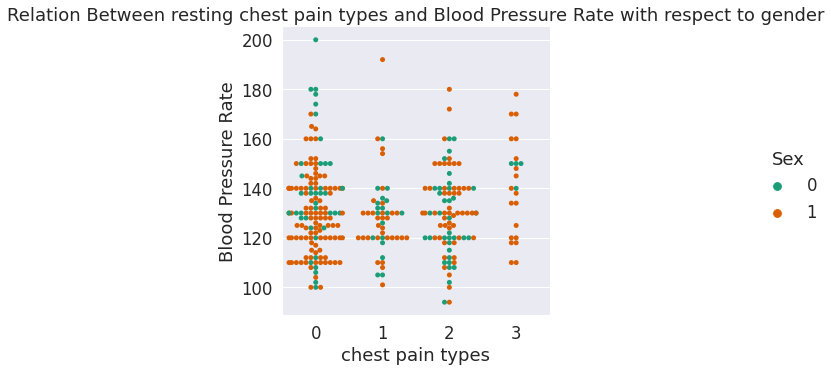

In [ ]:
#Plot on Relation Between resting chest pain types and Blood Pressure Rate with respect to gender
sns.catplot(x="Chest_pain", y="Resting_blood_pressure",hue="Sex",kind ="swarm" ,data=df,palette="Dark2")
plt.xlabel('chest pain types')
plt.ylabel('Blood Pressure Rate')
plt.title(label="Relation Between resting chest pain types and Blood Pressure Rate with respect to gender",loc ='center')

**Interpretation<br>
Acoording to the above catplot it is infered that males are more prone to heart attacks with comparitively higher level of blood pressure than females.**



<br>

### Heart Disease vs Fasting Blood Sugar

In [ ]:
df['Fasting_blood_sugar'].value_counts()

0    258
1     45
Name: Fasting_blood_sugar, dtype: int64

In [ ]:
#Compare Target column i.e. Heart Disease with Fasting Blood Sugar Column

pd.crosstab(df['Heart_disease'],df['Fasting_blood_sugar'])

Fasting_blood_sugar,0,1
Heart_disease,,
0,116,22
1,142,23


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

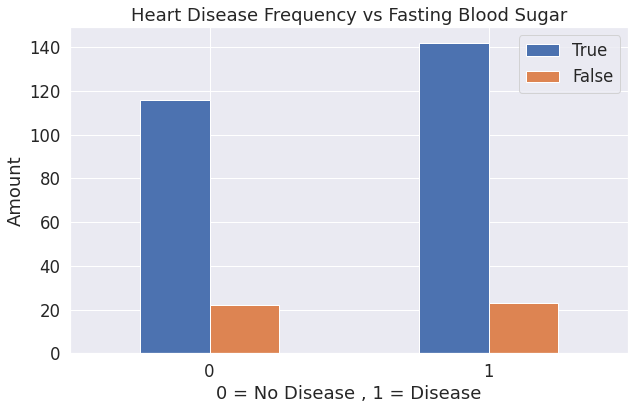

In [ ]:
#Create a plot for crosstab

pd.crosstab(df['Heart_disease'],df['Fasting_blood_sugar']).plot(kind="bar",figsize=(10,6));
plt.title("Heart Disease Frequency vs Fasting Blood Sugar")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["True","False"])
plt.xticks(rotation=0)

**Interpretation:<br> 
The above plot shows that the sugar level does not contribute to having or not having the heart disease**

<br>

### Slope rate vs cholestrol wrt Sex

Text(0.5, 1.0, 'Relation Between heart rate slope and cholestrol level with respect to gender')

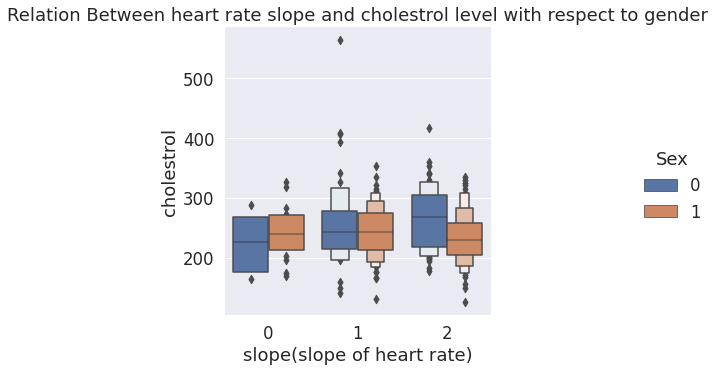

In [ ]:
#Plot on Relation Between heart rate slope and cholestrol level with respect to gender
sns.catplot(x="ST_slope", y="Cholesterol",hue="Sex",kind="boxen", data=df)
plt.xlabel('slope(slope of heart rate)')
plt.ylabel('cholestrol')
plt.title(label="Relation Between heart rate slope and cholestrol level with respect to gender",loc ='center')

**Interpretation<br>
Acoording to the above catplot the higher the cholestrol levels , the lower the heart rate slope ,primarily in men.**

<br>

### Heart Disease vs ECG Results

In [ ]:
df['ECG_results'].value_counts()

1    152
0    147
2      4
Name: ECG_results, dtype: int64

In [ ]:
#Compare Target column i.e. Heart Disease with ECG Results

pd.crosstab(df['Heart_disease'],df['ECG_results'])

ECG_results,0,1,2
Heart_disease,,,
0,79,56,3
1,68,96,1


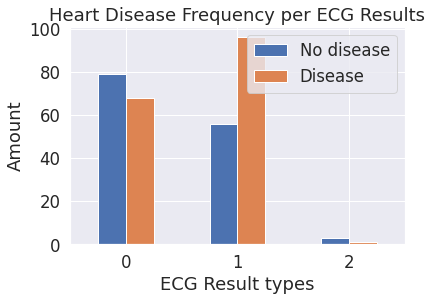

In [ ]:
# Make the crosstab more visual

pd.crosstab(df['ECG_results'],df['Heart_disease']).plot(kind='bar')
plt.title("Heart Disease Frequency per ECG Results")
plt.xlabel("ECG Result types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

**Interpretation:<br>
The above plot shows frequency of each ECG type for the population having and not having disease where type 1 is greater and more prone to having disease**

<br>

### Heart Disease vs Thalassemia types

In [ ]:
df['Thalassemia_types'].value_counts()

2    166
3    117
1     18
0      2
Name: Thalassemia_types, dtype: int64

In [ ]:
#Compare Target column i.e. Heart Disease with Thalassemia

pd.crosstab(df['Heart_disease'],df['Thalassemia_types'])

Thalassemia_types,0,1,2,3
Heart_disease,,,,
0,1,12,36,89
1,1,6,130,28


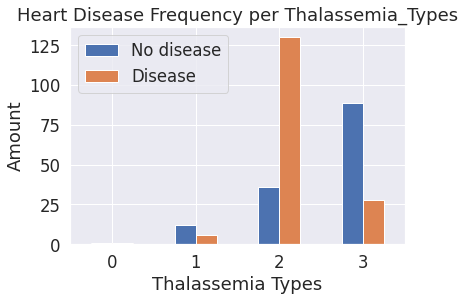

In [ ]:
# Make the crosstab more visual

pd.crosstab(df['Thalassemia_types'],df['Heart_disease']).plot(kind='bar')
plt.title("Heart Disease Frequency per Thalassemia_Types")
plt.xlabel("Thalassemia Types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

**Interpretation:<br>
The above plot shows frequency of each Thalassemia type for the population having and not having disease where type 2 is greater and is more prone to having disease**

<br>

### Chest Pain type with respect to age and sex

Text(0.5, 1.0, 'Chest Pain type with respect to age and sex')

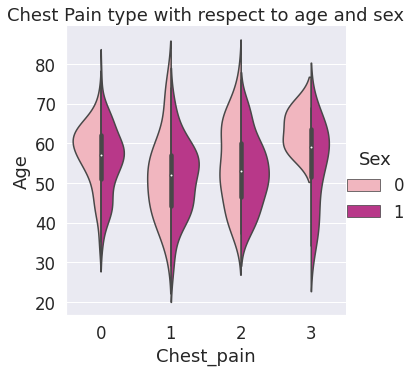

In [ ]:
sns.catplot(data=df, kind="violin", x="Chest_pain", y="Age",hue="Sex", split=True,palette="RdPu")
plt.title("Chest Pain type with respect to age and sex")

**Interpretation:<br>
The above plot shows the chest pain type with respect to age and sex and chest pain type 3 is greater for men which shows that they are more prone to heart disease**

<br><br>
## 5. Modelling
 We must experiment with the models, trying 3 different models and getting the results from them and comparing them later

In [ ]:
df.head()

#We will be taking independent variables to predict dependent variables

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Split data using Train-Test Split

In [ ]:
X=df.drop('Heart_disease',axis=1)
y=df['Heart_disease']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<br>
Now we have got our data split into training and test sets, it is time to build a Machine Learning model.

We will train it (find the patterns) on the training set.

And we will test it (use the patterns) on the test set.

**We're going to try 3 different Machine Learning models:**
1. Logistic Regression

2. K-Nearest Neighbours Classifier

3. Random Forest Classifier

## 1. Logistic Regression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Training score

lr.score(X_train,y_train)

0.8553719008264463

In [ ]:
#Prediction of the test variable

lr_y_preds=lr.predict(X_test)

In [ ]:
#Testing accuracy

lr.score(X_test,y_test)

0.8852459016393442

### Confusion Matrix

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


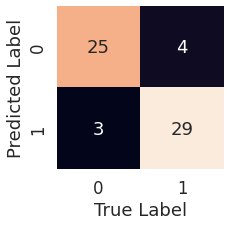

In [ ]:
plot_conf_mat(y_test,lr_y_preds)

### Classification Report

In [ ]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## 2. K-Nearest Neighbour

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#Training score

knn.score(X_train,y_train)

0.7603305785123967

In [ ]:
#Prediction of the test variable

knn_y_preds=knn.predict(X_test)

In [ ]:
#Testing accuracy

knn.score(X_test,y_test)

0.6885245901639344

### Confusion Matrix

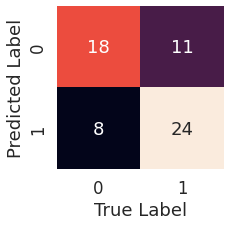

In [ ]:
plot_conf_mat(y_test,knn_y_preds)

### Classification Report

In [ ]:
print(classification_report(y_test,knn_y_preds))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



## 3. Random Forest

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Training score

rf.score(X_train,y_train)

1.0

In [ ]:
#Prediction of the test variable

rf_y_preds=rf.predict(X_test)
print(rf_y_preds)

[0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [ ]:
#Testing accuracy

rf.score(X_test,y_test)

0.8360655737704918

### Confusion Matrix

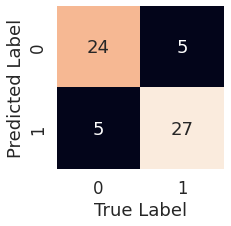

In [ ]:
plot_conf_mat(y_test,rf_y_preds)

### Classification Report

In [ ]:
print(classification_report(y_test,rf_y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### 4. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear') 
svc.fit(X_train,y_train)


SVC(kernel='linear')

In [ ]:
#Training score

svc.score(X_train,y_train)

0.8636363636363636

In [ ]:
#Prediction of the test variable

svc_y_preds=svc.predict(X_test)
print(svc_y_preds)

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [ ]:
#Testing accuracy

svc.score(X_test,y_test)


0.8688524590163934

### Confusion Matrix

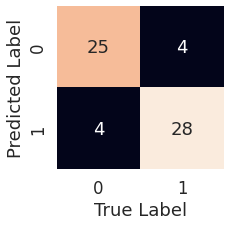

In [ ]:
plot_conf_mat(y_test,svc_y_preds)

### Classification Report

In [ ]:
print(classification_report(y_test,svc_y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### 5. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#Training score

dtc.score(X_train,y_train)


0.9132231404958677

In [ ]:
#Prediction of the test variable

dtc_y_preds=dtc.predict(X_test)
print(dtc_y_preds)

[0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [ ]:
#Testing accuracy

dtc.score(X_test,y_test)


0.8360655737704918

### Confusion Matrix

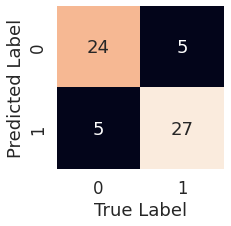

In [ ]:
plot_conf_mat(y_test,dtc_y_preds)

### Classification Report

In [ ]:
print(classification_report(y_test,dtc_y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



<br><br>
### Different Model Scores (accuracy)

In [ ]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN':knn.score(X_test,y_test),
             'Random Forest':rf.score(X_test,y_test),'SVC':svc.score(X_test,y_test),'Decision Tree':dtc.score(X_test,y_test)}

In [ ]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'SVC': 0.8688524590163934,
 'Decision Tree': 0.8360655737704918}

## Model Comparison

In [ ]:
#Based on accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest,SVC,Decision Tree
accuracy,0.885246,0.688525,0.836066,0.868852,0.836066


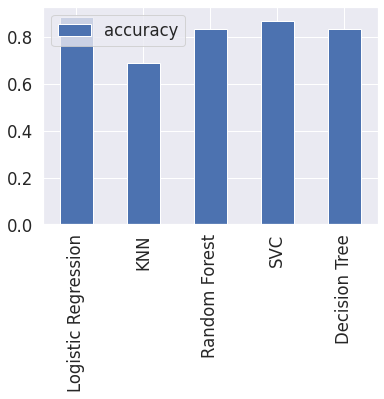

In [ ]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

Now we have got baseline model...and we know a model's first prediction aren't always what we should based our next steps off.
What should we do?

Let's look at the following:
* HyperParameter tuning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1-Score
* Classification Report
* ROC Curve
* Area under the curve(AUC)

### HyperParameter Tuning (Manually)

### KNN Tuning

In [ ]:
#Let's tune KNN
train_scores=[]
test_scores=[]

#Create a list of different n_neighbors
neighbors=range(1,21)

#Setup KNN instance
knn=KNeighborsClassifier()

#Loop thorugh different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update the trainig scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #Update the testing scores list
    test_scores.append(knn.score(X_test,y_test))


Maximum KNN score on the test data: 75.41


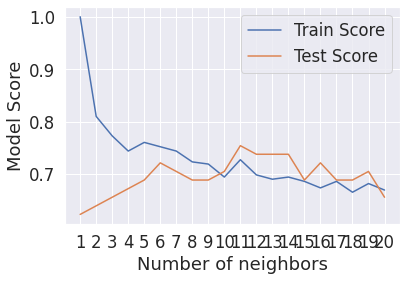

In [ ]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(np.arange(1,21))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}")


**After KNN tuning also, it is not predicting better than Random Forest and Logistic Regression. So we will discard it.**

### HyperParameter tuning with Randomized Search CV

We are going to tune:
* Logistic Regression
* Random Forest Classifier

... using RandomizedSearchCV

In [ ]:
#Create a hyperparameter grid for Logistic Regression

log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

#Create a hyperparameter grid for RandomForestClassifier(it is recommended to use continuous distributions for hyperparameter
# tuning for RandomForestClassifier i.e. why using "arange")

rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

Now we have got hyperparameters grids setup for each of our models, let's tune them using RandomizedSearchCV

In [ ]:
#Tune Logistic Regression
np.random.seed(42)

#Setup random hyperparameter search for Logistic Regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=2)

#Fit random hyperparameter search for Logistic Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [ ]:
#checking the best parameters we got from RandomizedSearchCV

rs_log_reg.best_params_ 

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
#Finding the score

rs_log_reg.score(X_test,y_test)

0.8852459016393442

**Now we have tuned Logistic Regression(), let's do the same for RandomForestClassifier()**

<br>

In [ ]:
#Setup Random Seed
np.random.seed(42)

#Setup random hyperparameter search for Logistic Regression, the combinations are many so randomly try 20.
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                              verbose=2)

#Fit random hyperparameter search for Logistic Regression
rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [ ]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
rs_rf.score(X_test,y_test)

0.8688524590163934

**So now we have done RandomizedSearchCV, we will eliminate RandomForest as it's score is not much as compared to logistic Regression**

<br><br>

### HyperParameter tuning with GridSearchCV

Since our Logistic Regression model provides the best scores so far, we will try and improve it again using GridSearchCV..

In [ ]:
#Different hyperparameters for our logistic Regression Model

log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":['liblinear']}

In [ ]:
#Tune Logistic Regression
np.random.seed(42)

#Setup random hyperparameter search for Logistic Regression
gs_log_reg=GridSearchCV(LogisticRegression(),
                              param_grid=log_reg_grid,
                              cv=5,
                              verbose=2)

#Fit random hyperparameter search for Logistic Regression
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### Evaluating our tuned Machine Learning model classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* precision
* recall
* f1-score

and also Cross Validation

To make comparisons and evaluate our trained model, first we need to make predictions.

In [ ]:
# Make predictions with tuned model
y_preds=gs_log_reg.predict(X_test)

In [ ]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

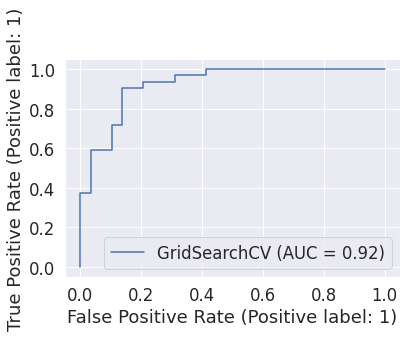

In [ ]:
#ROC curve --It measures how your model is performing by comparing the true positive rate with the False positive rate
#AUC curve is better if it is close to 1.0, this above function tells how much it is , here it is 0.92

plot_roc_curve(gs_log_reg,X_test,y_test)

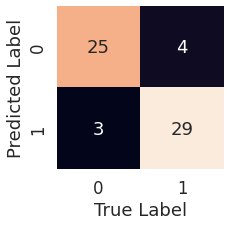

In [ ]:
plot_conf_mat(y_test,y_preds)

<br>**Now we have got a ROC curve, an AUC metric and a confusion Matrix, let's get a classification report as well as cross-validated, precision,recall and f1-score**

In [ ]:
print(classification_report(y_test,y_preds))
#This classification report is only generated on one test split, not cross validation.

#Precision indicates the propotion of positive identification a.k.a the model predicts class 1 
#Recall indicates proportion of actual positives which were correctly classified
#F1 is the combination of precision and recall
#Support are the no. of samples they were calculated upon
#Macro_avg does not take class imbalanced into account

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross validation

We are going to calculate accuracy, presion, recall, and f1-score of our model using cross-validation and to do so, we will be using  
`cross_val_score()`

In [ ]:
#check best hyperparameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
#Create a new classifier with best parameters

clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [ ]:
#Cross-validated accuracy

cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [ ]:
#It hase evaluated our model on 5 different splits, so we will take out the mean of it leading to average accuracy

cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [ ]:
#Cross-validated precison

cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [ ]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [ ]:
#Cross-validated recall

cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [ ]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [ ]:
#Cross-validated f1-score

cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [ ]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

In [ ]:
#Visualize cross-validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1-Score":cv_f1
                        },index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1-Score
0,0.847978,0.821587,0.927273,0.87054


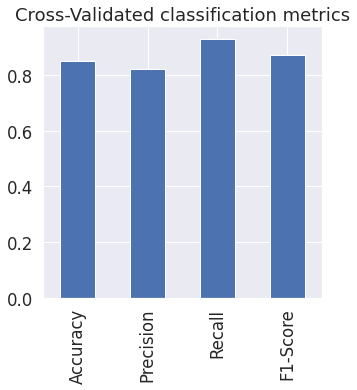

In [ ]:
cv_metrics.T.plot(kind="bar",figsize=(5,5),title="Cross-Validated classification metrics",legend=False);

<br>

## Feature Importance

Feature Importance is another way of asking, "which features contributed most to the outcomes of the model and how did they 
contribute?"

Finding feature importance is different for each machine learning model.One way to find feature importance is to search for
"(MODEL NAME) feature importance" over internet

Let's find the feature importance for our Logistic Regression model...

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
#Fit an instance of Logistic Regression

clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
df.head()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Helps to find Coefficients

clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [ ]:
# These coef's tell how much and in what way did each one of it contribute to predicting the target variable

feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

#This is a type of Model driven Exploratory data analysis

{'Age': 0.0032076883508599633,
 'Sex': -0.8606204883695241,
 'Chest_pain': 0.660014324982524,
 'Resting_blood_pressure': -0.01155970600550047,
 'Cholesterol': -0.0016649614843449207,
 'Fasting_blood_sugar': 0.040172360271308105,
 'ECG_results': 0.31603405294617176,
 'Maximum_heart_rate': 0.02458922341328129,
 'Exercise_induced_angina': -0.604701713592625,
 'ST_depression': -0.5679545646616215,
 'ST_slope': 0.4508539209693025,
 'Major_vessels': -0.6373332766360461,
 'Thalassemia_types': -0.6755509369619848}

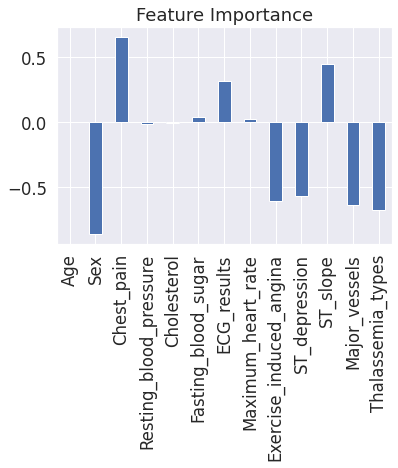

In [ ]:
#Visualize feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")